## Untersuchung von Trump- und Hitler-Texten nach dem Zipf'schen Gesetz, auf Hapax Legomena sowie der Type-Token-Ratio

1. Zipf'sches Gesetz:
Zipf'sches Gesetz besagt, dass die Häufigkeit eines Wortes in einem Text umgekehrt proportional zu seiner Rangfolge in der Häufigkeitsliste ist. Du kannst dies überprüfen, indem du die Wörter nach ihrer Häufigkeit sortierst und die Rangfolge bestimmen. Dann vergleichst du die tatsächliche Häufigkeit mit der erwarteten Häufigkeit nach Zipf'schem Gesetz.

2. Hapax Legomena:
Hapax Legomena sind Wörter, die im Text nur einmal vorkommen. Du kannst die Anzahl der Hapax Legomena zählen und als prozentualen Anteil an der Gesamtzahl der Wörter anzeigen.

3. Type-Token Ratio:
Die Type-Token Ratio ist das Verhältnis zwischen der Anzahl der verschiedenen Wörter (Types) und der Gesamtanzahl der Wörter im Text (Tokens). Dies gibt Aufschluss darüber, wie vielfältig der Wortschatz im Vergleich zur Gesamtlänge des Textes ist.

----------

#### Einlesen (zusätzlich über Colab)

In [1]:
#from google.colab import drive
import os
import glob
from collections import Counter
import matplotlib.pyplot as plt
import math

In [5]:
#drive.mount('/content/drive')

In [6]:
#os.chdir('/content/drive/MyDrive/Colab Notebooks')

------------------------------

#### Einlesen der Verzeichnisse und Worteingrenzung

In [2]:
while True: 
    input_name = input("Was soll untersucht werden? Hitler, Trump oder beide?").lower()
    
    if input_name == "hitler":
        path_part = 'clean_hitler'
        break
    elif input_name == "trump":
        path_part = 'clean_trump'
        break
    elif input_name == "beide":
        path_part = 'cleaned_all_docs'
        break
    else: 
        print("Falsche Eingabe!")

Was soll untersucht werden? Hitler, Trump oder beide? hitler


In [11]:
while True: 
    input_path = input("Was soll untersucht werden? allwords, nouns, adjectives oder verbs?").lower()
    
    if input_path == "allwords":
        #directory_path = "/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/all_words/"+path_part #linux
        directory_path = "/Users/Simon/Bachelorarbeit/vergleich_mk_trump/cleaned_docs/all_words/"+path_part #windows
        break
    elif input_path == "nouns":
        #directory_path = "/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/nouns/"+path_part
        directory_path = "/Users/Simon/Bachelorarbeit/vergleich_mk_trump/cleaned_docs/nouns/"+path_part
        break
    elif input_path == "verbs":
        #directory_path = "/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/verbs/"+path_part
        directory_path = "/Users/Simon/Bachelorarbeit/vergleich_mk_trump/cleaned_docs/verbs/"+path_part
        break
    elif input_path == "adjectives":
        #directory_path = "/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/adjectives/"+path_part
        directory_path = "/Users/Simon/Bachelorarbeit/vergleich_mk_trump/cleaned_docs/adjectives/"+path_part
        break
    else: 
        print("Falsche Eingabe!")

print('\n'+100*'*'+'\n')

text_files = []
for filename in glob.glob(f"{directory_path}/*.txt"):
    # Extract filename without path using os.path.basename()
    base_filename = os.path.basename(filename)
    text_files.append(base_filename)

print(f'Im eingelesen Ordner befinden sich {len(text_files)} Textdateien')

print('\n'+100*'*'+'\n')

print('Dateinamen:')
print(text_files)

print('\n'+100*'*'+'\n')

def read_texts_from_folder(folder_path):
    texts = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
    return ' '.join(texts)
    
print(directory_path)
text = read_texts_from_folder(directory_path)
print(text[:100])

Was soll untersucht werden? allwords, nouns, adjectives oder verbs? allwords



****************************************************************************************************

Im eingelesen Ordner befinden sich 29 Textdateien

****************************************************************************************************

Dateinamen:
['00_preface_buch01.txt', 'chapter01_buch01.txt', 'chapter01_buch02.txt', 'chapter02_buch01.txt', 'chapter02_buch02.txt', 'chapter03_buch01.txt', 'chapter03_buch02.txt', 'chapter04_buch01.txt', 'chapter04_buch02.txt', 'chapter05_buch01.txt', 'chapter05_buch02.txt', 'chapter06_buch01.txt', 'chapter06_buch02.txt', 'chapter07_buch01.txt', 'chapter07_buch02.txt', 'chapter08_buch01.txt', 'chapter08_buch02.txt', 'chapter09_buch01.txt', 'chapter09_buch02.txt', 'chapter10_buch01.txt', 'chapter10_buch02.txt', 'chapter11_buch01.txt', 'chapter11_buch02.txt', 'chapter12_buch01.txt', 'chapter12_buch02.txt', 'chapter13_buch02.txt', 'chapter14_buch02.txt', 'chapter15_buch02.txt', 'epilogue_buch02.txt']

**********************************

-------------------

#### Umsetzung nach Zipf, Hapax Legomena und Type-Token-Ratio

In [12]:
def tokenize(text):
    # Tokenisierung: Text in Wörter aufteilen
    return text.split()

def zipfs_law(word_freq, num_ranks):
    # Wörter nach Häufigkeit sortieren
    sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)

    # Nur die ersten num_ranks Ränge ausgeben
    for rank, (word, freq) in enumerate(sorted_word_freq[:num_ranks], start=1):
        print(f"Rang {rank}: {word} - Häufigkeit: {freq}")

    # Visualisierung des Zipf'schen Gesetzes (nur die ersten num_ranks Ränge)
    frequencies = [freq for word, freq in sorted_word_freq[:num_ranks]]
    ranks = range(1, len(frequencies) + 1)
    plt.plot(ranks, frequencies, marker='o', linestyle='None', color='b')
    plt.xlabel('Rang')
    plt.ylabel('Häufigkeit')
    plt.title(f"Zipf'sches Gesetz (erste {num_ranks} Ränge)")
    plt.show()

def hapax_legomena(word_freq):
    # Berechnung der Hapax Legomena
    hapax_count = sum(1 for word, freq in word_freq.items() if freq == 1)
    total_words = sum(word_freq.values())
    hapax_percentage = (hapax_count / total_words) * 100
    print(f"Anzahl der Hapax Legomena: {hapax_count}")
    print(f"Prozentualer Anteil der Hapax Legomena: {hapax_percentage:.2f}%")

def type_token_ratio(word_freq):
    # Berechnung der Type-Token Ratio
    num_types = len(word_freq)
    num_tokens = sum(word_freq.values())
    ttr = num_types / num_tokens
    print(f"Type-Token Ratio: {ttr:.4f}")


Geben Sie die Anzahl der Ränge für das Zipf'sche Gesetz ein... 10


Rang 1: people - Häufigkeit: 985
Rang 2: would - Häufigkeit: 960
Rang 3: state - Häufigkeit: 884
Rang 4: one - Häufigkeit: 868
Rang 5: german - Häufigkeit: 861
Rang 6: must - Häufigkeit: 698
Rang 7: time - Häufigkeit: 659
Rang 8: nation - Häufigkeit: 576
Rang 9: could - Häufigkeit: 560
Rang 10: movement - Häufigkeit: 558


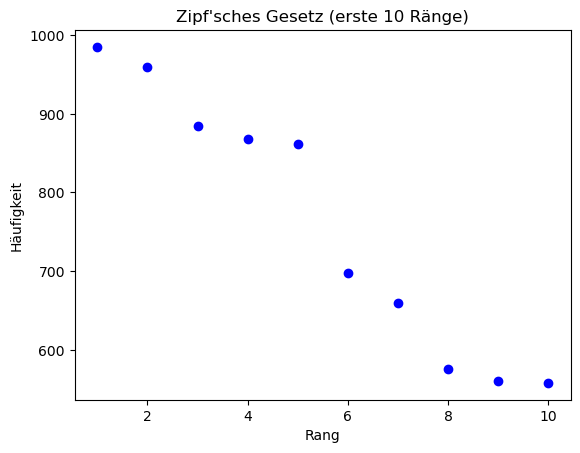


Anzahl der Hapax Legomena: 5202
Prozentualer Anteil der Hapax Legomena: 4.18%

Type-Token Ratio: 0.0982


In [13]:
#tokenisierung
tokens = tokenize(text)

#wortfrequenz berechnen
word_freq = Counter(tokens)

#zipf'sches gesetz visualisieren mit eingabe der anzahl der ränge
num_ranks = int(input("Geben Sie die Anzahl der Ränge für das Zipf'sche Gesetz ein..."))
zipfs_law(word_freq, num_ranks)

print()

#hapax legomena berechnen und anzeigen
hapax_legomena(word_freq)

print()

#type-token ratio berechnen und anzeigen
type_token_ratio(word_freq)

--------------------

#### Umsetzung von Shannon-Index und Simpson-Index

Sowohl der Shannon-Index als auch der Simpson-Index werden normalerweise zur Berechnung der Biodiversität in einem Ökosystem verwendet, indem sie die Häufigkeit und Gleichmäßigkeit der Arten berücksichtigen. Bei einer Textanalyse könnten sie jedoch auch verwendet werden, um die Vielfalt und Gleichmäßigkeit der verwendeten Wörter zu bewerten.

Shannon-Index:
Beim Einsatz des Shannon-Index in einer Textanalyse würde man die verschiedenen Wörter im Text betrachten und ihre relative Häufigkeit berechnen. Ein höherer Shannon-Index würde darauf hindeuten, dass der Text eine größere Vielfalt an Wörtern aufweist und dass diese Wörter gleichmäßiger über den Text verteilt sind. Ein niedrigerer Shannon-Index deutet darauf hin, dass der Text weniger vielfältig ist und dass einige Wörter dominanter sind als andere.

Simpson-Index:
Der Simpson-Index in einer Textanalyse würde auch die relative Häufigkeit der verschiedenen Wörter berücksichtigen. Ein höherer Simpson-Index würde darauf hinweisen, dass der Text weniger vielfältig ist und dass einige Wörter dominanter sind als andere, ähnlich wie beim Shannon-Index. Ein niedrigerer Simpson-Index würde jedoch auf eine größere Vielfalt und eine gleichmäßigere Verteilung der Wörter hinweisen.

In [14]:
def shannon_index(text):
    # Zähle die Häufigkeit jedes Wortes im Text
    word_count = Counter(text.split())
    total_words = sum(word_count.values())
    
    # Berechne die relative Häufigkeit jedes Wortes
    word_probabilities = [count / total_words for count in word_count.values()]
    
    # Berechne den Shannon-Index
    shannon = -sum(prob * math.log(prob) for prob in word_probabilities)
    return shannon

def simpson_index(text):
    # Zähle die Häufigkeit jedes Wortes im Text
    word_count = Counter(text.split())
    total_words = sum(word_count.values())
    
    # Berechne die relative Häufigkeit jedes Wortes
    word_probabilities = [count / total_words for count in word_count.values()]
    
    # Berechne den Simpson-Index
    simpson = sum(prob**2 for prob in word_probabilities)
    return simpson

In [15]:
def shannon_index(text):
    # Zähle die Häufigkeit jedes Wortes im Text
    word_count = Counter(text.split())
    total_words = sum(word_count.values())
    num_unique_words = len(word_count)

    # Berechne die relative Häufigkeit jedes Wortes
    equal_probability = 1 / num_unique_words
    word_probabilities = [equal_probability] * num_unique_words

    # Berechne den maximalen Shannon-Index
    max_shannon = -sum(prob * math.log(prob) for prob in word_probabilities)
    return max_shannon


# Berechne und drucke den maximalen Shannon-Index für den Beispieltext
print("Maximal möglicher Shannon-Index in diesem Text:", shannon_index(text))


Maximal möglicher Shannon-Index in diesem Text: 9.409846753521522


Simpson-Index: Der maximale Wert des Simpson-Index tritt auf, wenn eine einzige Art oder ein einzelnes Element in deinem System oder deiner Population vorhanden ist. In diesem Fall wäre die relative Häufigkeit dieser Art oder dieses Elements gleich 1, während die relative Häufigkeit aller anderen Arten oder Elemente gleich 0 wäre.

In [16]:
# Berechne und drucke den Shannon-Index und den Simpson-Index für den Beispieltext
print("Shannon-Index:", shannon_index(text))
print("Simpson-Index:", simpson_index(text))

Shannon-Index: 9.409846753521522
Simpson-Index: 0.001083973332489689
